# Risk forecasting DNN model

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import json

import yfinance as yf

### Dataset

In [91]:
# fetch closing values
sp500 = '^GSPC'
period='5y'
interval='1wk'

sp500_data = yf.Ticker(sp500)
sp500_history = sp500_data.history(period=period, interval=interval)
close = sp500_history.Close.loc[sp500_history.Close != 0][:-1]

# compute logarithmic returns
log_returns = np.log(close) - np.log(close.shift(1))
log_returns.dropna(inplace=True)

# fetch VIX volatility data
vix = '^VIX'
vix_data = yf.Ticker(vix)
vix_history = vix_data.history(period=period, interval=interval)
vix_close = vix_history.Close.loc[vix_history.Close != 0][:-1]

# compute numerical volitility as standard deviation over 5-point rolling window
volatility = close.pct_change().rolling(5).std()

# generate dataframe of closing prices and log returns
X = pd.DataFrame({
    'close': close,
    'returns': (log_returns - log_returns.mean()) / log_returns.std(),
    'vix': (vix_close - vix_close.mean()) / vix_close.std(),
    'volatility': (volatility - volatility.mean()) / volatility.std()
})
X.dropna(inplace=True)
X

/Users/tom/opt/miniconda3/envs/ThesisEnv/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,close,returns,vix,volatility
Date,,,,
2017-07-03,2425.179932,-0.047548,-0.944078,-1.030693
2017-07-10,2459.270020,0.451277,-1.140137,-0.794236
2017-07-17,2472.540039,0.127842,-1.157642,-0.792018
2017-07-24,2472.100098,-0.081789,-1.049110,-0.782629
2017-07-31,2476.830078,-0.003000,-1.079452,-0.884631
...,...,...,...,...
2022-05-02,4123.339844,-0.153555,1.273257,-0.504826
2022-05-09,4023.889893,-0.995689,1.119211,-0.533671
2022-05-16,3901.360107,-1.241145,1.184564,-0.494884


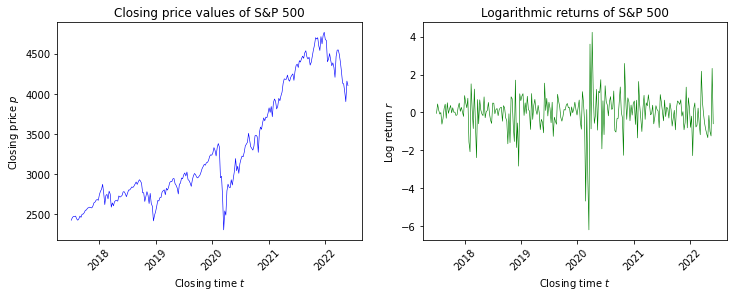

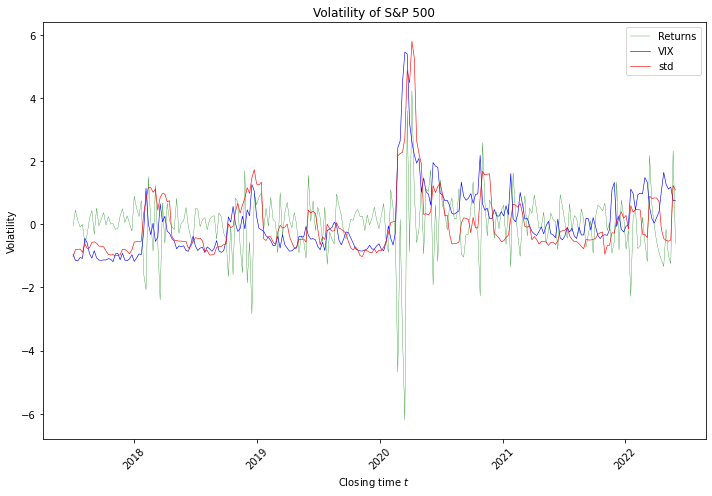

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(X.close, linewidth=0.6, color='b')
ax[0].set(title=f'Closing price values of S&P 500', xlabel=r'Closing time $t$', ylabel=r'Closing price $p$')
ax[0].tick_params(axis='x', rotation=45)

ax[1].plot(X.returns, linewidth=0.6, color='g')
ax[1].set(title=f'Logarithmic returns of S&P 500', xlabel=r'Closing time $t$', ylabel=r'Log return $r$')
ax[1].tick_params(axis='x', rotation=45)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(X.returns, linewidth=0.3, color='g', label='Returns')
ax.plot(X.vix, linewidth=0.6, color='b', label='VIX')
ax.plot(X.volatility, linewidth=0.6, color='r', label='std')
ax.set(title=f'Volatility of S&P 500', xlabel=r'Closing time $t$', ylabel=r'Volatility')
ax.tick_params(axis='x', rotation=45)
ax.legend()

plt.tight_layout()
plt.show()